In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Relevant functions found in: **Add to another file**

In [2]:
def extract_substances(dataframe):
    # Get the column names from the DataFrame
    columns = dataframe.columns

    # Create a dictionary to store the count of each unique substance
    substance_counts = {}

    # Extract unique substances from the column names and count occurrences
    for column in columns:
        # Split the column name based on the numeric part
        substance = ''.join([i for i in column if not i.isdigit()])
        
        # Update the count in the dictionary
        substance_counts[substance] = substance_counts.get(substance, 0) + 1

    # Convert the dictionary to two lists (substances and counts) and sort them
    unique_substances_list = sorted(list(substance_counts.keys()))
    counts_list = [substance_counts[substance] for substance in unique_substances_list]

    return unique_substances_list,counts_list

In [3]:
def get_fp_data(fpc_object,pcs = 2,gridpoints = np.arange(360)):
    """
    'Inputs'
    fpc_obj - functional data object already in pca form (1-D)
    pcs - number of functional principal components to take into account (int)
    
    'Outputs'
    np.arr - X array (gridpoints)
    np.arr 2D - Y arrays (data points - no. fpcs - 2 by default)
    """
    fpc_grid_points = fpc_object.components_.to_grid(gridpoints).grid_points[0]
    fpc_data_points = [np.zeros_like(fpc_grid_points) for i in range(pcs)]
    fpc_variance_exp = np.array([fpc_object.explained_variance_ratio_[i] for i in range(pcs)])
    for i in range(pcs):
        fpc_data_points[i] = fpc_object.components_.to_grid(gridpoints)[i].data_matrix[0].flatten()
        
    return fpc_grid_points,fpc_data_points,fpc_variance_exp

In [4]:
#define parameters
specie = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
specie_dim = {'E':'X','G':'Y','R':'Z'}

In [40]:
#locate files and load data for each species
directory = r'D:\VP\ARTICLE2\ArticleData'
mean = True #if IGT should be false
data = {s:pd.read_csv(r'{}\{}_{}_i_data.csv'.format(directory,s,specie_dim[s])) for s in specie}

In [41]:
data['E'].head()

,Copper0,Copper1,Copper2,Copper3,Copper4,Copper5,Copper6,Copper7,Methomyl0,Methomyl1,...,Methomyl4,Methomyl5,Methomyl6,Verapamil0,Verapamil1,Verapamil2,Zinc0,Zinc1,Zinc2,Zinc3
0,0.000000,0.013496,0.010313,0.006673,0.004786,0.185005,0.0,0.045759,0.0,0.0,...,0.0,0.027120,0.0,0.005985,0.0,0.017634,0.0,0.024239,0.027087,0.000000
1,0.004483,0.016588,0.010062,0.005755,0.004799,0.181456,0.0,0.038471,0.0,0.0,...,0.0,0.025385,0.0,0.005561,0.0,0.017054,0.0,0.028436,0.035160,0.000000
2,0.000000,0.014006,0.009641,0.005196,0.004684,0.180394,0.0,0.031634,0.0,0.0,...,0.0,0.024105,0.0,0.005051,0.0,0.015857,0.0,0.034271,0.039412,0.004712
3,0.000000,0.011910,0.009293,0.005245,0.004482,0.178462,0.0,0.027380,0.0,0.0,...,0.0,0.022787,0.0,0.004525,0.0,0.013629,0.0,0.039724,0.038390,0.005609
4,0.000000,0.010553,0.009516,0.005864,0.007022,0.178143,0.0,0.024033,0.0,0.0,...,0.0,0.021368,0.0,0.005905,0.0,0.013543,0.0,0.032204,0.038384,0.005814


In [42]:
#identify all used substances
substances,counts = extract_substances(data[[*data][0]])
for i in range(4): print('{}: {} repetitions'.format(substances[i],counts[i]))

Copper: 8 repetitions
Methomyl: 7 repetitions
Verapamil: 3 repetitions
Zinc: 4 repetitions


In [43]:
#colours inspired from plotly
plot_colors = {'Copper':'#8c564b','Methomyl':'#9467bd','Verapamil':'#d62728','Zinc':'#e377c2'}
custom_palette = [plot_colors[s] for s in plot_colors]
sns.set_palette(custom_palette)
custom_palette

['#8c564b', '#9467bd', '#d62728', '#e377c2']

In [44]:
#Define columns and y values for functional data analysis
cols = data[[*data][0]].columns
y = ['{}'.format(s) for i,s in enumerate(substances) for x in range(counts[i])]
y

['Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Verapamil',
 'Verapamil',
 'Verapamil',
 'Zinc',
 'Zinc',
 'Zinc',
 'Zinc']

In [45]:
#custom legend handles
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color=plot_colors[sub], label=sub) for sub in substances]

(0.0, 360.0)

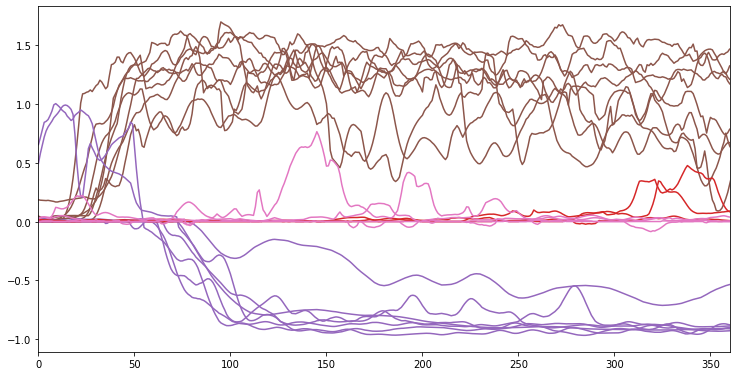

In [47]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'E'
for x,col in enumerate(data[sp].columns):
    axe.plot(data[sp].index,data[sp][col].values,color = plot_colors[y[x]])
    
#axe.legend(handles = legend_handles,fontsize = 15)
axe.set_xlim([0,360])

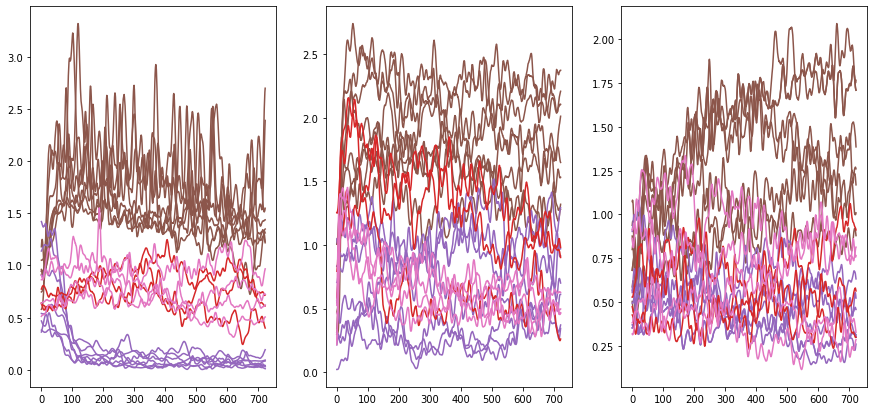

In [10]:
fig,axes = plt.subplots(1,3,figsize=(15,7))
for i,s in enumerate(specie):
    for x,col in enumerate(data[s].columns):
        axes[i].plot(data[s].index,data[s][col].values,color = plot_colors[y[x]])

Functional BSpline approx

In [25]:
from skfda.representation.grid import FDataGrid
from skfda.representation.basis import BSplineBasis

In [27]:
#Define timestep for data and extract first 2 hours (60 * 2 * 3) - timesteps 20s
timestep = 30
full_length = data[[*data][0]].shape[0]
#n_rows = (full_length//timestep)*timestep
n_rows = 360
#Cut dataframe at n_rows
for s in specie:
    data[s] = data[s].iloc[:n_rows]
    
data[s].shape

(360, 22)

Explain

In [29]:
#define FDA parameters with uneven knots
domain_range = (0,n_rows)
order = 4

#define knots with uneven spacing
knots = np.hstack((np.array([0,30,60,90,120,150]),np.arange(180,n_rows+90,90)))
#knots = np.hstack((np.array([0,30,60,90,120,150]),np.arange(180,181)))

n_basis = len(knots) + order - 2

bbs = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)
print('FDA knots')
knots

FDA knots


array([  0,  30,  60,  90, 120, 150, 180, 270, 360])

In [30]:
#define grid points and data matrices
grid_points = np.arange(n_rows)
data_matrices = {s:np.transpose(np.array(data[s].iloc[:n_rows])) for s in specie}

#define functional data grids
fds = {s:FDataGrid(data_matrix=data_matrices[s],grid_points=grid_points,) for s in specie}

Create basis functions

In [31]:
#create basis functions
bss = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)

In [32]:
#basis dictionary per species
X_bss = {s:fds[s].to_basis(bss) for s in specie}

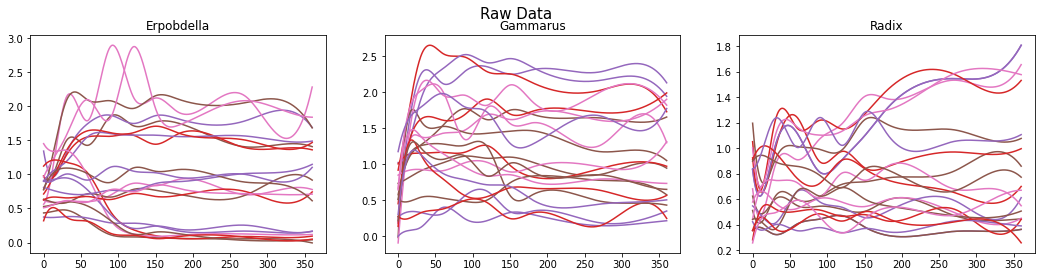

In [33]:
#plot b spline functinos
#sort colors error
fig,axe = plt.subplots(1,3,figsize = (18,4))
fig.suptitle('Raw Data',fontsize = 15)
for i,s in enumerate(specie): 
    X_bss[s].plot(axes = axe[i])
    axe[i].set_title(specie[s])

Convert BSpline functional data back to array of smoothed points

In [35]:
#bspline approximations as array
X_grid = {s:X_bss[s].to_grid(grid_points = np.arange(n_rows)) for s in specie}

(0.0, 360.0)

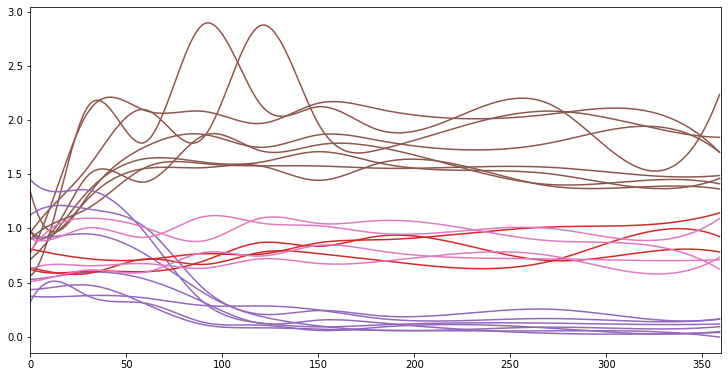

In [39]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'E'
for x,col in enumerate(data[sp].columns):
    axe.plot(X_grid[sp].grid_points[0],X_grid[sp].data_matrix[x].flatten(),color = plot_colors[y[x]])
axe.set_xlim([0,360])